<a href="https://colab.research.google.com/github/JakeOh/202011_itw_pyml_wkd/blob/main/ml02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST(Modified National Institute of Science and Technology) 데이터 셋

* 손글씨 숫자(0, 1, 2, ..., 9) 데이터
* 분류 알고리즘을 테스트할 때 가장 많이 사용되는 데이터 셋

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# scikit-learn 패키지에서 예제로 제공하는 MNIST 데이터 셋을 다운로드
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
print(mnist['DESCR'])  # mnist 데이터 셋에 대한 설명

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X, y = mnist['data'], mnist['target']
# X: 손글씨 이미지 데이터
# y: 손글씨 이미지 레이블(정답)

In [7]:
X.shape, y.shape
#> X: 2-d array, y: 1-d array

((70000, 784), (70000,))

In [8]:
X[0]  # X의 첫번째 row의 모든 컬럼(특성) 데이터: 0 ~ 255

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
y[0]  #> 문자열(str) 타입

'5'

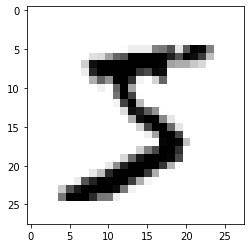

In [11]:
img = X[0].reshape((28, 28))
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

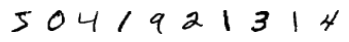

In [13]:
# 데이터 셋 X의 첫 10개 이미지를 출력
fig, ax = plt.subplots(nrows=1, ncols=10)
for i in range(10):
    img = X[i].reshape((28, 28))  # 784 -> 28x28 변환
    ax[i].imshow(img, cmap=plt.cm.binary)  # i번째 subplot에 이미지를 그림
    ax[i].axis('off')  # 축 (레이블)을 제거

plt.show()

In [14]:
# 레이블(타켓) y의 첫 10개 값을 출력
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [15]:
# 레이블(타겟) y는 문자열 타입 -> 숫자로 변환
y = y.astype(np.int16)  # 16bit(=2byte) 정수
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int16)

In [17]:
# train/test 셋 분리
n = 60_000  # 훈련 셋의 데이터 개수
X_train, y_train = X[:n], y[:n]  # 0 <= i < 60_000
X_test, y_test = X[n:], y[n:]  # 60_000 <= i < 70_000
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))